# Data Preparation
<b>1. Data import</b>

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration

In [216]:
# facing with typos error by replacing the wrong one in to correct one via comparing invalid value with valid value
df = pd.read_csv('bank.txt', sep='\t')

valid_value = {
    "job": ["admin.", "blue-collar", "entrepreneur", "housemaid", 
"management", "retired", "self-employed", "services", "student", "technician", "unemployed", 
"unknown"],
    "marital": ["divorced", "married", "single", "unknown"],
    "education": ["basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", 
"professional.course", "university.degree", "unknown"],
    "default" : ["no", "yes", "unknown"],
    "housing" : ["no", "yes", "unknown"],
    "loan" : ["no", "yes", "unknown"],
    "contact" : ["cellular", "telephone"],
    "month": ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    "day_of_week" : ["mon", "tue", "wed", "thu", "fri"],
    "poutcome" : ["failure", "nonexistent", "success"]
}

# Change typos value if that is approximate with valid one
def auto_fix(error, valid):
    if (not error or error=="na"): return error
    anchor, percent = error, 0
    for value in valid:
        try:
            s = sum([1 if char in value else 0 for char in error])
            if (s*100/len(value)>percent): 
                anchor = value
                percent = s*100/len(value)
        except: continue
    return anchor

error = "basic0. 4y"
print("Example:", error, "of column education change to =>", auto_fix(error, valid_value["education"]))

def typos_treatment(df, valid_value):
    for key, val in valid_value.items():
        index = df[~df[key].isin(val)].index
        error_list = list(df.iloc[index][key].unique())
        for error in error_list:
            df[key] = pd.Series(df[key].replace(error, auto_fix(error, valid_value[key])))
    return df

df = typos_treatment(df, valid_value)
df

Example: basic0. 4y of column education change to => basic.4y


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


**2.2**

Text(0.5, 0, 'age')

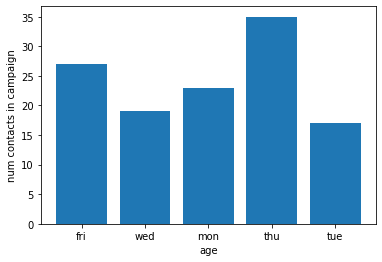

In [248]:
x = list(df['campaign'])
y = list(df['day_of_week'])
rg = len(x)
plt.bar(y[:rg], x[:rg])
plt.ylabel("num contacts in campaign")
plt.xlabel("age")

Assume the bar chart we could relize that the current campaign that effectively prevalent in the day of Thursday with the maximum value of contacts could take, instead of that, Tuesday could be the day that people tend to avoid the call than.

=> This could lead directly to specific plan that the bank should focus their event in the day of weekends.

Text(0.5, 0, 'Age')

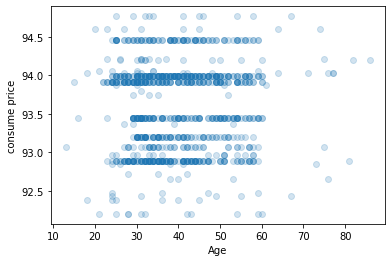

In [428]:
x = list(df['age'])
y = list(df['cons.price.idx'])
rg = len(x)//4
plt.scatter(x[:rg], y[:rg], alpha=0.2, cmap='viridis')
plt.ylabel("consume price")
plt.xlabel("Age")

Aprroaching the alpha scatter chart, clearly that the age between 20-60 years old could be the most range of age consuming most value of price, which could be most in 93.0 to 94.0

=> In the result, the marketing plan should focus in the people of age range youngers, especially in 35 years old.

Text(0.5, 0, 'Last month contact')

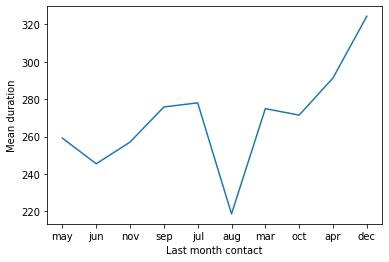

In [379]:
from statistics import mean

def getMeanValues(df, column_check, column_get):
    items = list(df[column_check].unique())
    values = [(mean(list(df.loc[df[column_check]==ite, column_get].dropna()))) for ite in items]
    return values, items

x, y = getMeanValues(df, 'month', 'duration')
rg = len(x)
plt.plot(y[:rg], x[:rg])
plt.ylabel("Mean duration")
plt.xlabel("Last month contact")

After calculating the mean value of duration in each month, we could get the information that despite the maximum contacts be in May, the most duration of particular call is in the September and March.

=> The event of campaign should focus on the Summer and Spring of seasons

**2.3**

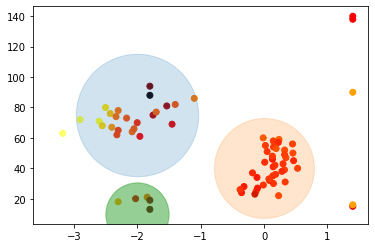

In [426]:
# Visualize the correlation of 3 columns, including [age], [emp.var.rate] and [cons.conf.idx]
x, y = getMeanValues(df, 'age', 'emp.var.rate')
z, y = getMeanValues(df, 'age', 'cons.conf.idx')
plt.scatter(x, y, alpha=1, c=z, cmap='hot')
plt.scatter(-2, 75, s=15000, alpha=0.2)
plt.scatter(0, 40, s=10000, alpha=0.2)
plt.scatter(-2, 10, s=4000, alpha=0.5, cmap="")

From the heat scatter graph, after treating value of employment variance and consumer confidence to the mean values depending on the unique value of age, we could observe that with the age of 40, customers have a tendency to be stable in the variance of employment due to their high confidence in life, in which, the age with less confidence is nearly 70 have less stability in the employment variance, which is as same as the age of below 20.